In [8]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [14]:
tenda_rs = pd.read_csv('tenda_propostas_RS.csv',sep=';',decimal = ',')

In [15]:
tenda_rs.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [16]:
tenda_rs.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO17071800383346255,145000.0,2130.8,0.0
1,PRO17080102679345645,135768.0,2656.1,11035.3
2,PRO17080302857346295,138000.0,2976.3,1101.6
3,PRO17080703368346609,131095.0,1462.5,1489.4
4,PRO17081805112345946,115107.0,2483.0,3819.4


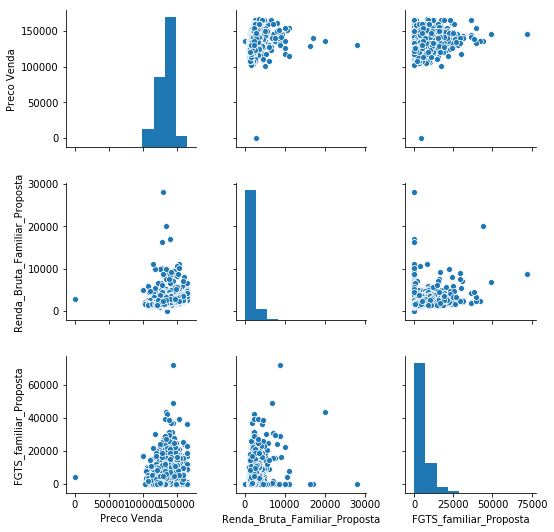

In [17]:
sb.pairplot(tenda_rs)

In [19]:
tenda_drop_rs = tenda_rs.drop(['Chave unica'],axis = 1)
tenda_drop_rs

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,145000.0,2130.8,0.0
1,135768.0,2656.1,11035.3
2,138000.0,2976.3,1101.6
3,131095.0,1462.5,1489.4
4,115107.0,2483.0,3819.4
5,120248.3,1699.3,4091.6
6,115107.0,1557.0,0.0
7,126000.0,1877.7,1711.8
8,127136.0,3885.2,4700.0
9,138000.0,2336.4,14550.1


K_MEANS (RS)

In [20]:
from sklearn.cluster import KMeans

In [21]:
sb.set_style('darkgrid')

In [22]:
wcss = []

1 486391948969.15186
2 276226520070.02094
3 174972350516.00797
4 137699746823.66144
5 117800758548.32895
6 99454187369.98596
7 88703971799.54573
8 81715653383.45203
9 75283887874.75653


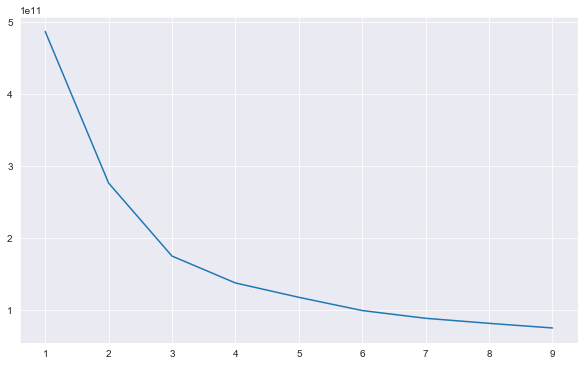

In [24]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_rs)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [25]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [26]:
kmeans.fit(tenda_drop_rs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [27]:
kmeans.labels_

array([0, 2, 2, ..., 2, 1, 2])

CLASSES CRIADAS 

In [28]:
tenda_rs['Kclasses'] = kmeans.labels_

In [29]:
tenda_rs. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO17071800383346255,145000.0,2130.8,0.0,0
1,PRO17080102679345645,135768.0,2656.1,11035.3,2
2,PRO17080302857346295,138000.0,2976.3,1101.6,2
3,PRO17080703368346609,131095.0,1462.5,1489.4,2
4,PRO17081805112345946,115107.0,2483.0,3819.4,1
5,PRO17083107304345808,120248.3,1699.3,4091.6,1
6,PRO17091108688346099,115107.0,1557.0,0.0,1
7,PRO17092510590345563,126000.0,1877.7,1711.8,2
8,PRO17100411896345743,127136.0,3885.2,4700.0,2
9,PRO17100511983345783,138000.0,2336.4,14550.1,0


In [30]:
tenda_rs['Kclasses'] = kmeans.labels_

In [31]:
tenda_rs.Kclasses.value_counts()

2    2570
1     807
0     551
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [32]:
tenda_rs.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,3928.00,3928.00,3928.00,3928.00
mean,131810.30,2094.92,4571.45,1.51
std,9787.59,1029.08,5196.40,0.73
min,0.00,0.00,0.00,0.00
25%,128000.00,1662.22,766.18,1.00
50%,133000.00,1876.70,3230.95,2.00
75%,135462.07,2201.32,6643.05,2.00
max,165745.30,28000.00,71797.10,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


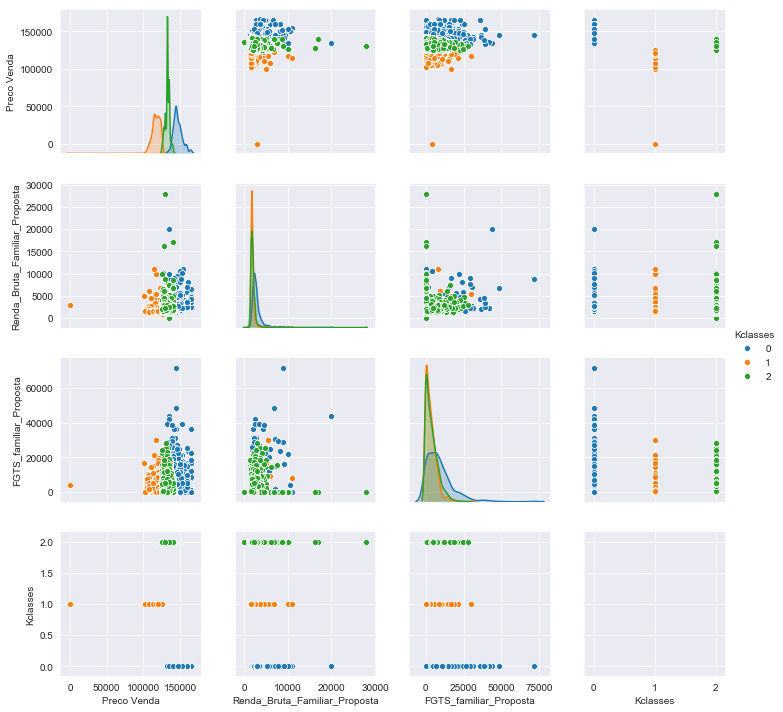

In [33]:
sb.pairplot(tenda_rs,hue='Kclasses')

EXPORTANDO DADOS

In [34]:
tenda_rs.to_csv('clustertenda_RS.csv',sep=';',decimal=',')